In [173]:
import pandas as pd
import rdata

In [174]:
parsed = rdata.parser.parse_file("Lsun3D.rda")
converted = rdata.conversion.convert(parsed)

Y = converted['Lsun3D']['Data']
clrs = converted['Lsun3D']['Cls']


In [203]:
Y = pd.read_csv('datasets/Academic/academic_interpret.csv')
Y['Target'] = pd.Series(Y['Target']).astype('category').cat.codes
Y['Target']

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int8

In [3]:
from sklearn.metrics import pairwise_distances
X = pairwise_distances(Y)

In [4]:
from sklearn.manifold import TSNE
import pylab

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


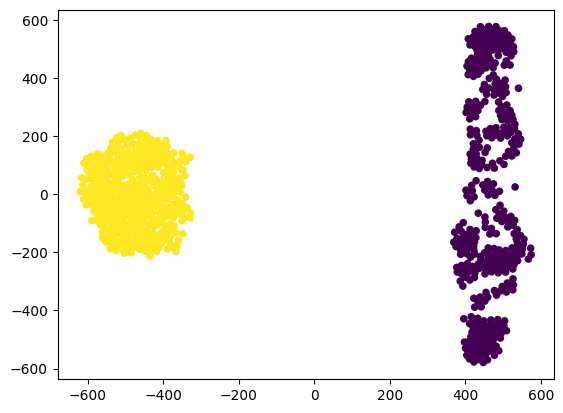

In [5]:
e1 = TSNE(perplexity=60,init='pca',learning_rate='auto').fit_transform(X)
scatter = pylab.scatter(e1[:,0],e1[:,1],20,clrs)

pylab.show()

In [186]:
import plotly.express as px
import pandas as pd
import numpy as np

df = pd.DataFrame(Y)
df


,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,127.3,1,0,0,1,1,0,20,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,142.5,1,0,0,0,1,0,19,0,0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,124.8,1,0,0,0,1,0,19,0,0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,119.6,1,0,0,1,0,0,20,0,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,141.5,0,0,0,1,0,0,45,0,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,122.2,0,0,0,1,1,0,19,0,0,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,119.0,1,0,1,0,0,0,18,1,0,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,149.5,1,0,0,1,0,1,30,0,0,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,153.8,1,0,0,1,0,1,20,0,0,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [188]:
fig = px.parallel_coordinates(df, color="Target", labels={},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=1)
fig.show()

In [106]:
pylab.show()

In [207]:
#D = pd.read_csv('food_comp.csv')
#X = D.drop(['NDB_No','Shrt_Desc'],axis=1).to_numpy()
X = Y.drop(['Target'],axis=1).to_numpy()
Labels = Y['Target'].to_numpy()

d = np.where(np.isnan(X))
X = np.delete(X,d[0],axis=0)
print(np.where(X[:,2] != 0))

u = X.mean(axis=0)
std = X.std(axis=0)
# d = np.where( np.logical_or(X >= u + 3*std ,X <= u + 3 *-std))
# X = np.delete(X,d[0],axis=0)
X.shape
X /= X.max(axis=0)


rows = np.random.choice(X.shape[0],500)
X = X[rows,:]
Labels = Labels[rows]
X.shape


(array([  42,  221,  237,  391,  402,  478,  494,  509,  598,  629,  836,
        855,  864, 1000, 1018, 1080, 1150, 1252, 1575, 1723, 1745, 1843,
       1844, 1896, 1898, 1956, 2067, 2104, 2154, 2178, 2348, 2372, 2416,
       2499, 2538, 2600, 2733, 2953, 2974, 3026, 3167, 3208, 3321, 3400,
       3730, 3873, 3887, 4054, 4100, 4296, 4398]),)


(500, 24)

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



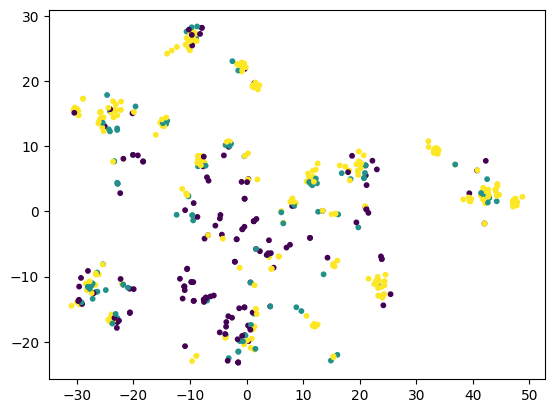

In [208]:
d = pairwise_distances(X)
Y1 = TSNE(perplexity=20).fit_transform(X)

pylab.scatter(Y1[:,0],Y1[:,1],10,Labels)
pylab.show()

In [163]:
df = pd.read_csv('molecules.csv')
df["log(IGC50-1)"].loc[df["log(IGC50-1)"] <= 0] = 0
df["log(IGC50-1)"].loc[df["log(IGC50-1)"] > 0] = 1
X = df.drop(["mol_id", "log(IGC50-1)"],axis=1).to_numpy()
X = np.delete(X,np.where(X.max(axis=0) == 0)[0],axis=1)
X /= X.max(axis=0)
X.shape


/tmp/ipykernel_116021/1329023850.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_116021/1329023850.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(644, 214)

In [161]:
X.shape

(644, 214)

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



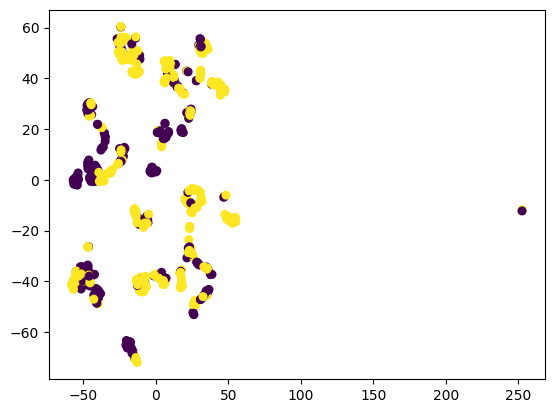

In [164]:
d = pairwise_distances(X)

Y = TSNE(perplexity=10,init='pca',learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],30,df["log(IGC50-1)"])
pylab.show()

In [209]:
dim1 = np.random.choice(X.shape[1],5)
dim2 = np.random.choice(X.shape[1],5)
x1 = X[:,dim1]
x2 = X[:,dim2]


In [210]:
import mview

(644, 5)
(644, 5)
len 1
len 1


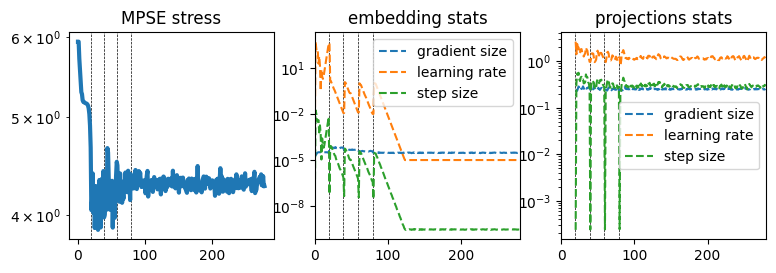

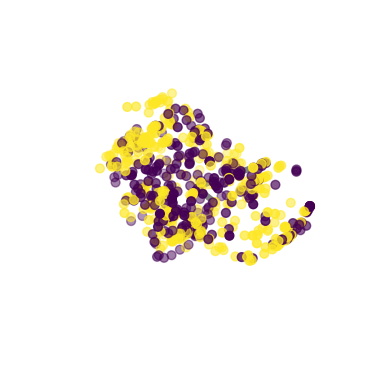

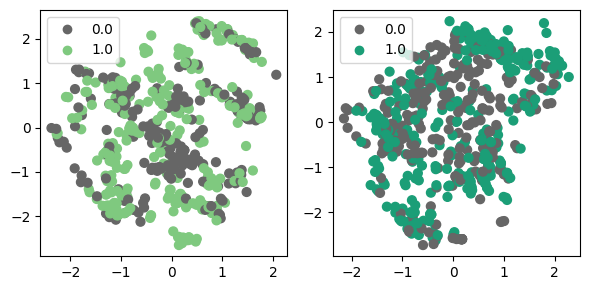

In [171]:
mview.mpse_tsne([x1,x2],perplexity=30,
                    sample_colors=Labels,sample_classes=[Labels,Labels],
                    show_plots=True)

In [172]:
for i in range(200):
    dim1 = np.random.choice(X.shape[1],5)
    dim2 = np.random.choice(X.shape[1],5)
    x1 = X[:,dim1]
    x2 = X[:,dim2]

    mview.mpse_tsne([x1,x2],perplexity=30,
                    sample_colors=df["log(IGC50-1)"],sample_classes=[df["log(IGC50-1)"],df["log(IGC50-1)"]],
                    show_plots=True,
                    output="molecules/x1:{},x2:{}.png")

(644, 5)
(644, 5)
len 1
len 1


KeyboardInterrupt: 